# Курсовая работа
## Выполнил студент Лопеш Сениксон Сандро группы БФИ2201

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

# выполнение задач

#### Включение необходимых библиотек для работы :

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import csv 

#### Создание класса хеш-таблицы:

In [333]:
# Создаем класс узла списка
# Класс Node представляет узел в связанном списке. Каждый узел имеет ключ, значение и ссылку на следующий узел в списке.
# Этот класс создан для обработки коллизий ключ.
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10 # начальная емкость таблицы
        self.size = 0 # количество элементов в таблице
        self.buckets = [None] * self.capacity # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2 # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

#### Создание функции, которая будет выполнять алгоритм быстрой сортировки:

In [334]:
def quick_sort(array):
    if len(array) < 1:
        return array
    else:
        # За опорный элемент принимаем посдедний элемент основного массива и удаляем его оттуда
        pivot=array.pop()
        # Создаем 3 массива: с элементами меньшими, равными и большими проверяемого значения
        low, same, high = [], [pivot], [] 
        for item in array:
            if item == pivot:
                same.append(item)
            elif item > pivot:
                high.append(item)
            else:
                low.append(item)
        return quick_sort(low) + same + quick_sort(high)

#### Создание функции для загрузки хеш-таблицы:

In [335]:
def calculation(file):
    ht1 = HashTable()
    ht2 = HashTable()
    max_tovar = 0 # общая выручка и переменная для максимального количества проданного товара
    revenue  = 0  #
    
    max_sales = "" # товар проданный максимальное количесво раз
    count_row = 0 # количество строк в csv файле
    names_array, reven_array = [], [] # массив для ключей / название товаров и массив для выручки
    
    for row in file: #читаем csv построчно
        if count_row != 0:         
            revenue += int(row[6]) #общая выручка
            names_array.append(row[2]) # Добавляем название товара в массив names_array
            
            if max_tovar < int(row[4]): #товар, который был продан максимальное количество раз
                max_tovar = int(row[4]) 
                max_sales = row[2] 
            
            reven_array.append(int(row[6])) #создаем массив с выручкой 
            ht2.add(str(row[6]),row[2]) #в хеш таблицу записываем значение выручки/ключ и товар
            
            ht1.add(str(row[2]), row[4]) #добавляем в хэш-таблицу товар/ключ и количество его продаж
            ht1.add(str(row[2])+ "1", row[6]) #добавляем в хэш-таблицу товар/ключ и его выручку
        count_row += 1 
    
    for item in range(0,(count_row-1),1): # выводим
        print(f'{names_array[item]} был продан {ht1.get(names_array[item])} раз, доля товара от выручки составяет {round(int(ht1.get(names_array[item]+"1"))/revenue*100,2)}%')

    #сортируем массив с выручками
    result = quick_sort(reven_array)
    
    return revenue, max_sales, ht2.get(str(result[-1]))

In [336]:
try:
    data = pd.read_csv('TabelaCSVProgram1.csv', sep=';')
    with open('TabelaCSVProgram1.csv', encoding='utf-8') as file:
        file_reader = csv.reader(file, delimiter = ";")
        file_data = list(file_reader)
        revenue, max_sales, max_tovar = calculation(file_data)
        print()
        print(f'Общая выручка магазина: {revenue} рублей')
        print(f'Товар, который был продан наибольшее количество раз: {max_sales}')
        print(f'Товар, который принес наибольшую выручку: {max_tovar}')
except Exception as e: 
    print('Датасет не найден!')
    print(f"An error occurred: {str(e)}")

Grundig 50 NANO GH 8100 был продан 200 раз, доля товара от выручки составяет 12.89%
Bose QuietComfort был продан 150 раз, доля товара от выручки составяет 1.34%
Apple MacBook Air 13 был продан 100 раз, доля товара от выручки составяет 7.16%
HONOR Pad 8 был продан 50 раз, доля товара от выручки составяет 1.25%
Apple iPhone 13 был продан 250 раз, доля товара от выручки составяет 6.8%
Beko WSPE7612W был продан 75 раз, доля товара от выручки составяет 5.67%
Electrolux EACS-07HAR_A/N3_21Y был продан 30 раз, доля товара от выручки составяет 1.72%
HUAWEI Pura70 был продан 300 раз, доля товара от выручки составяет 9.67%
Thunderobot 911S Core был продан 150 раз, доля товара от выручки составяет 5.32%
Candy CCRN 6180W был продан 60 раз, доля товара от выручки составяет 1.4%
Nest Learning Thermostat был продан 250	 раз, доля товара от выручки составяет 1.7%
Lenovo V15 G4 AMN был продан 350 раз, доля товара от выручки составяет 10.9%
Hisense WFQP6012VM был продан 100	 раз, доля товара от выручки с

In [337]:
#print(data.columns)

In [338]:
revenue = data['Общая стоимость'].sum()
print(f'Общая выручка магазина: {revenue}')

Общая выручка магазина: 279304000


#### Отобразить товара с наибольшим кол-вом продаж

In [339]:
data['Название товара'][data['Количество продаж'] == data['Количество продаж'].max()].values

array(['Apple iPhone 15 Pro'], dtype=object)

#### Отобразить товара с наименьшим выручкой

In [340]:
data['Название товара'][data['Общая стоимость'] == data['Общая стоимость'].max()].values

array(['Apple iPhone 15 Pro'], dtype=object)

#### Вывод доли выручки каждого продукта из общей выручки:

In [341]:
data['Доля от общей выручки в %'] = data['Общая стоимость'] / (revenue / 100)
data['Доля от общей выручки в %'] = data['Доля от общей выручки в %'].round(2).astype(float)
data.index = data['Название товара']

In [342]:
data[['Номер заказа', 'Количество продаж', 'Общая стоимость', 'Доля от общей выручки в %']]

,Номер заказа,Количество продаж,Общая стоимость,Доля от общей выручки в %
Название товара,,,,
Grundig 50 NANO GH 8100,0000-2002,200,35998000,12.89
Bose QuietComfort,0001-2003,150,3748500,1.34
Apple MacBook Air 13,0010-2004,100,19999000,7.16
HONOR Pad 8,0011-2005,50,3495000,1.25
Apple iPhone 13,0100-2006,250,18999750,6.80
Beko WSPE7612W,0101-2007,75,15824250,5.67
Electrolux EACS-07HAR_A/N3_21Y,0110-2008,30,4799700,1.72
HUAWEI Pura70,0111-2009,300,26998500,9.67
Thunderobot 911S Core,1000-2010,150,14849850,5.32


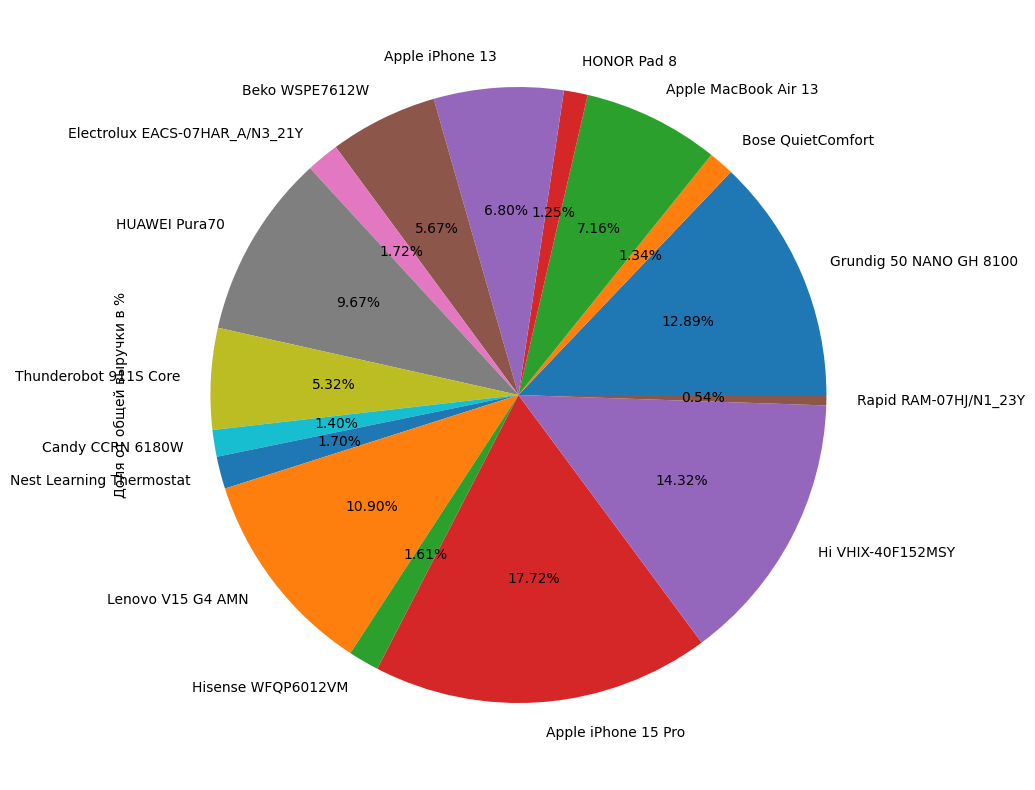

In [343]:
data.plot(y = 'Доля от общей выручки в %', kind = 'pie', figsize=(10,10), autopct='%.2f%%', legend=False)
plt.show()